# Exploring ebay car sales data
The goal of this project is to practice data cleaning and analysis using Pandas, as well as becoming familiar with some of the unique benefits jupyter notebook provides for pandas.

We'll do that by analysing a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle by user orgesleka. The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

Several modifications were made to the original dataset by the Dataquest team:

- 50,000 data points were sampled from the full dataset, to ensure the code runs quickly in the hosted environment
- The original version uploaded to Kaggle was clean to be easier to work with, so the Dataquest team dirtied the dataset a bit to more closely resemble what a real-world scraped dataset would look like
### The data dictionary provided with data is as follows:
- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `odometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month in which the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.

**Lets start by importing pandas and reading the dataset.**

In [1]:
import pandas as pd

autos = pd.read_csv("autos.csv", encoding = "Latin-1")

In [2]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Data cleaning

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

We created "autos" dataset with 50 000 datapoints. We can see that there a few changes we should make to data so its easier to work with.
- Convert all the colomn names from camelcase to snakecase a reword some names based on the data dictionary to be more descriptive
- Numeric data stored as text which can be cleaned and converted

In [4]:
autos.rename(columns = {"yearOfRegistration" : "registration_year",
                        "monthOfRegistration" : "registration_month",
                        "notRepairedDamage" : "unrepaired_damage",
                        "dateCreated" : "ad_created", 
                        "offerType" : "offer_type", 
                        "vehicleType": "vehicle_type",
                        "powerPS" : "power_ps",
                        "fuelType" : "fuel_type", 
                        "nrOfPictures" : "nr_of_pictures",
                        "postalCode" : "postal_code", 
                        "lastSeen" : "last_seen",
                        "dateCrawled" : "date_crawled"}, inplace = True)

In [5]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Now lets see what we can learn about the data by describing it.

In [6]:
autos.describe(include = "all")

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 16:37:21,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


As we can see columns: seller, offer_type, abtest, gearbox and unrepaired_damage have only 2 unique values. Also column nr_of_pictures have NaN unique values we shloud take a closer a look and decide if its a candidate to be droped.

Now lets convert price and odometer to integer and also rename odometer to odemeter_km.

In [7]:
autos["seller"].value_counts()

privat        49999
gewerblich        1
Name: seller, dtype: int64

In [8]:
autos["offer_type"].value_counts()

Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64

In [9]:
autos["abtest"].value_counts()

test       25756
control    24244
Name: abtest, dtype: int64

In [10]:
autos["gearbox"].value_counts()

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

In [11]:
autos["unrepaired_damage"].value_counts()

nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64

In [12]:
autos["nr_of_pictures"].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

As we can see columns: seller, offer_type other then 1 listing have the same value and column nr_of_picture has no values so we can safely drop these columns.

In [13]:
autos = autos.drop(columns = ["seller", "offer_type", "nr_of_pictures"])

### Price and odometer
Now lets convert price and odometer to integers and rename odometer to odometer_km.

In [14]:
autos["price"] = autos["price"].str.replace(",", "")
autos["price"] = autos["price"].str.replace("$", "").astype(int)

In [15]:
autos["odometer"] = autos["odometer"].str.replace(",","")
autos["odometer"] = autos["odometer"].str.replace("km","").astype(int)
autos.rename(columns = {"odometer" : "odometer_km"}, inplace = True)

Now lets investigate odometer_km and price column to look for "odd" data.

In [16]:
autos["price"].describe().apply("{0:.1f}".format)

count       50000.0
mean         9840.0
std        481104.4
min             0.0
25%          1100.0
50%          2950.0
75%          7200.0
max      99999999.0
Name: price, dtype: object

In [17]:
autos["price"].value_counts().sort_index(ascending = False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [18]:
autos[autos["price"] > 3000000].head(20)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111,test,limousine,1973,manuell,48,escort,50000,3,benzin,ford,nein,2016-03-12 00:00:00,94469,2016-03-12 22:45:27
11137,2016-03-29 23:52:57,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000,control,coupe,1960,manuell,368,NaN,100000,1,benzin,sonstige_autos,nein,2016-03-29 00:00:00,73033,2016-04-06 21:18:11
24384,2016-03-21 13:57:51,Schlachte_Golf_3_gt_tdi,11111111,test,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-21 00:00:00,18519,2016-03-21 14:40:18
27371,2016-03-09 15:45:47,Fiat_Punto,12345678,control,NaN,2017,NaN,95,punto,150000,0,NaN,fiat,NaN,2016-03-09 00:00:00,96110,2016-03-09 15:45:47
39377,2016-03-08 23:53:51,Tausche_volvo_v40_gegen_van,12345678,control,NaN,2018,manuell,95,v40,150000,6,NaN,volvo,nein,2016-03-08 00:00:00,14542,2016-04-06 23:17:31
39705,2016-03-22 14:58:27,Tausch_gegen_gleichwertiges,99999999,control,limousine,1999,automatik,224,s_klasse,150000,9,benzin,mercedes_benz,NaN,2016-03-22 00:00:00,73525,2016-04-06 05:15:30
42221,2016-03-08 20:39:05,Leasinguebernahme,27322222,control,limousine,2014,manuell,163,c4,40000,2,diesel,citroen,NaN,2016-03-08 00:00:00,76532,2016-03-08 20:39:05
47598,2016-03-31 18:56:54,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,12345678,control,limousine,2001,manuell,101,vectra,150000,3,benzin,opel,nein,2016-03-31 00:00:00,4356,2016-03-31 18:56:54
47634,2016-04-04 21:25:21,Ferrari_FXX,3890000,test,coupe,2006,NaN,799,NaN,5000,7,NaN,sonstige_autos,nein,2016-04-04 00:00:00,60313,2016-04-05 12:07:37


In [19]:
autos["price"].value_counts().sort_index().head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

In [20]:
autos[autos["price"] < 100]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
25,2016-03-21 21:56:18,Ford_escort_kombi_an_bastler_mit_ghia_ausstattung,90,control,kombi,1996,manuell,116,NaN,150000,4,benzin,ford,ja,2016-03-21 00:00:00,27574,2016-04-01 05:16:49
27,2016-03-27 18:45:01,Hat_einer_Ahnung_mit_Ford_Galaxy_HILFE,0,control,NaN,2005,NaN,0,NaN,150000,0,NaN,ford,NaN,2016-03-27 00:00:00,66701,2016-03-27 18:45:01
30,2016-03-14 11:47:31,Peugeot_206_Unfallfahrzeug,80,test,kleinwagen,2002,manuell,60,2_reihe,150000,6,benzin,peugeot,ja,2016-03-14 00:00:00,57076,2016-03-14 11:47:31
55,2016-03-07 02:47:54,Mercedes_E320_AMG_zu_Tauschen!,1,test,NaN,2017,automatik,224,e_klasse,125000,7,benzin,mercedes_benz,nein,2016-03-06 00:00:00,22111,2016-03-08 05:45:44
64,2016-04-05 07:36:19,Autotransport__Abschlepp_Schlepper,40,test,NaN,2011,NaN,0,5er,150000,5,NaN,bmw,NaN,2016-04-05 00:00:00,40591,2016-04-07 12:16:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49884,2016-03-11 13:55:30,Audi_a6_2.5l__Schnaeppchen_nur_heute,0,test,kombi,1999,manuell,150,a6,150000,11,diesel,audi,NaN,2016-03-11 00:00:00,27711,2016-03-12 03:17:08
49943,2016-03-16 20:46:08,Opel_astra,0,control,NaN,2016,manuell,101,astra,150000,8,benzin,opel,NaN,2016-03-16 00:00:00,89134,2016-03-17 19:44:20
49960,2016-03-25 22:51:55,Ford_KA_zu_verschenken_***Reserviert***,0,control,kleinwagen,1999,manuell,60,ka,150000,6,benzin,ford,NaN,2016-03-25 00:00:00,34355,2016-03-25 22:51:55
49974,2016-03-20 10:52:31,Golf_1_Cabrio_Tuev_Neu_viele_Extras_alles_eing...,0,control,cabrio,1983,manuell,70,golf,150000,2,benzin,volkswagen,nein,2016-03-20 00:00:00,8209,2016-03-27 19:48:16


After looking over some of the price values I decided to drop listings where price is below 100 and above 4 million dollars. I do realise that some of the cars bellow 100 dollar price are so cheap, because they might be totaled, or really old and not running, but I  believe that most of the listings bellow 100 dollars are outliers.

In [21]:
autos = autos[autos["price"].between(100,4000000)]

In [22]:
autos["odometer_km"].value_counts()

150000    31215
125000     5038
100000     2101
90000      1733
80000      1412
70000      1214
60000      1153
50000      1010
40000       814
30000       777
5000        761
20000       757
10000       245
Name: odometer_km, dtype: int64

In the odometer_km there are no outliers, most of the cars listed have 150 000km.

In [23]:
autos.describe()

,price,registration_year,power_ps,odometer_km,registration_month,postal_code
count,4.823000e+04,48230.000000,48230.000000,48230.000000,48230.000000,48230.000000
mean,6.125042e+03,2004.729795,117.689322,125916.545718,5.801700,50987.826830
std,2.286169e+04,87.892058,201.218822,39546.680447,3.677083,25737.613018
min,1.000000e+02,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.250000e+03,1999.000000,73.000000,125000.000000,3.000000,30823.000000
50%,3.000000e+03,2004.000000,107.000000,150000.000000,6.000000,49716.000000
75%,7.499000e+03,2008.000000,150.000000,150000.000000,9.000000,71665.000000
max,3.890000e+06,9999.000000,17700.000000,150000.000000,12.000000,99998.000000


After removing price outliers we are left with 48 230 listings. Now lets move on looking at date columns.

In [24]:
autos[["date_crawled", "ad_created", "last_seen"]][:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [25]:
for col in ['date_crawled', 'ad_created', 'last_seen']:
    autos.loc[:, col] = autos.loc[:, col].str[:10].str.replace('-','').astype(int)

In [26]:
autos["date_crawled"].value_counts(normalize = True, dropna = True).sort_index()

20160305    0.025358
20160306    0.014037
20160307    0.036056
20160308    0.033174
20160309    0.033009
20160310    0.032283
20160311    0.032594
20160312    0.036906
20160313    0.015675
20160314    0.036658
20160315    0.034315
20160316    0.029463
20160317    0.031516
20160318    0.012897
20160319    0.034729
20160320    0.037798
20160321    0.037217
20160322    0.032905
20160323    0.032283
20160324    0.029442
20160325    0.031495
20160326    0.032304
20160327    0.031122
20160328    0.034957
20160329    0.034128
20160330    0.033734
20160331    0.031847
20160401    0.033693
20160402    0.035600
20160403    0.038607
20160404    0.036575
20160405    0.013062
20160406    0.003172
20160407    0.001389
Name: date_crawled, dtype: float64

It looks like that crawling occured from march 5, 2016 and ended in april 7, 2016. Distribution is more or less uniform except for the last 2 days having significantly fewer ads.

In [27]:
autos["ad_created"].value_counts(normalize = True, dropna = True).sort_index()

20150611    0.000021
20150810    0.000021
20150909    0.000021
20151110    0.000021
20151205    0.000021
              ...   
20160403    0.038855
20160404    0.036927
20160405    0.011798
20160406    0.003255
20160407    0.001244
Name: ad_created, Length: 76, dtype: float64

Listings on ebay were created from juny 2015 till the april of 2016. I can not see any obvious outliers int this colomn.

In [28]:
autos["last_seen"].value_counts(normalize = True, dropna = True).sort_index()

20160305    0.001078
20160306    0.004313
20160307    0.005432
20160308    0.007319
20160309    0.009579
20160310    0.010637
20160311    0.012399
20160312    0.023782
20160313    0.008874
20160314    0.012627
20160315    0.015861
20160316    0.016442
20160317    0.028095
20160318    0.007319
20160319    0.015758
20160320    0.020651
20160321    0.020547
20160322    0.021356
20160323    0.018578
20160324    0.019759
20160325    0.019096
20160326    0.016670
20160327    0.015550
20160328    0.020858
20160329    0.022310
20160330    0.024694
20160331    0.023823
20160401    0.022849
20160402    0.024902
20160403    0.025130
20160404    0.024528
20160405    0.125088
20160406    0.221957
20160407    0.132138
Name: last_seen, dtype: float64

Distribution of last_seen is kinda suspitious since the last 3 days contribute to over 47% of all recored last_seen dates. I do not know how the crawler operated and why the data looks like that.

### Lets look at registration year now

In [29]:
autos["registration_year"].value_counts().sort_index(ascending = False).head(20)

9999       3
9000       1
8888       1
6200       1
5911       1
5000       3
4800       1
4500       1
4100       1
2800       1
2019       2
2018     468
2017    1383
2016    1202
2015     380
2014     662
2013     801
2012    1308
2011    1618
2010    1587
Name: registration_year, dtype: int64

In [30]:
autos["registration_year"].value_counts().sort_index(ascending = True).head(20)

1000    1
1001    1
1111    1
1800    2
1910    2
1927    1
1929    1
1931    1
1934    2
1937    4
1938    1
1939    1
1941    2
1943    1
1948    1
1950    1
1951    2
1952    1
1953    1
1954    2
Name: registration_year, dtype: int64

In [31]:
autos[autos["registration_year"] < 1930]

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
10556,20160401,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,nein,20160401,63322,20160401
21416,20160312,Essex_super_six__Ford_A,16500,control,cabrio,1927,manuell,40,andere,5000,5,benzin,ford,NaN,20160312,74821,20160315
22101,20160309,BMW_Andere,11500,test,cabrio,1929,manuell,15,andere,5000,1,NaN,bmw,ja,20160309,70569,20160407
22316,20160329,VW_Kaefer.__Zwei_zum_Preis_von_einem.,1500,control,NaN,1000,manuell,0,kaefer,5000,0,benzin,volkswagen,NaN,20160329,48324,20160331
22659,20160314,Opel_Corsa_B,500,test,NaN,1910,NaN,0,corsa,150000,0,NaN,opel,NaN,20160314,52393,20160403
24511,20160317,Trabant__wartburg__Ostalgie,490,control,NaN,1111,NaN,0,NaN,5000,0,NaN,trabant,NaN,20160317,16818,20160407
28693,20160322,Renault_Twingo,599,control,kleinwagen,1910,manuell,0,NaN,5000,0,benzin,renault,NaN,20160322,70376,20160406
32585,20160402,UNFAL_Auto,450,control,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,nein,20160402,63322,20160404
49283,20160315,Citroen_HY,7750,control,NaN,1001,NaN,0,andere,5000,0,NaN,citroen,NaN,20160315,66706,20160406


After checking the cars and the year they were made, I decide to remove all cars of registration year below 1927(those are outliers) and above 2016, since the crawling occured in 2016.

In [32]:
autos = autos[autos["registration_year"].between(1927, 2016)]

In [33]:
print(autos["registration_year"].value_counts(normalize = True).sort_index().to_string())

1927    0.000022
1929    0.000022
1931    0.000022
1934    0.000043
1937    0.000086
1938    0.000022
1939    0.000022
1941    0.000043
1943    0.000022
1948    0.000022
1950    0.000022
1951    0.000043
1952    0.000022
1953    0.000022
1954    0.000043
1955    0.000043
1956    0.000086
1957    0.000043
1958    0.000086
1959    0.000129
1960    0.000475
1961    0.000129
1962    0.000086
1963    0.000173
1964    0.000259
1965    0.000367
1966    0.000475
1967    0.000561
1968    0.000561
1969    0.000410
1970    0.000798
1971    0.000561
1972    0.000712
1973    0.000496
1974    0.000518
1975    0.000388
1976    0.000453
1977    0.000475
1978    0.000906
1979    0.000733
1980    0.001747
1981    0.000604
1982    0.000884
1983    0.001100
1984    0.001100
1985    0.002028
1986    0.001532
1987    0.001553
1988    0.002869
1989    0.003689
1990    0.007162
1991    0.007291
1992    0.007939
1993    0.009060
1994    0.013504
1995    0.025736
1996    0.029230
1997    0.041526
1998    0.0504

## Analysis
Now that I more or less cleaned data its time to proceed to analysis.

### Mean price by brand
First I want to see how to **brand** distribution looks like, my assumption is that german brands will have the most listings, like volkswagen, bmw or mercedes benz.

In [34]:
brands_by_listing = autos["brand"].value_counts()
print(brands_by_listing)

volkswagen        9801
bmw               5108
opel              4970
mercedes_benz     4480
audi              4022
ford              3238
renault           2181
peugeot           1384
fiat              1187
seat               846
skoda              761
nissan             711
mazda              706
smart              658
citroen            651
toyota             593
hyundai            464
sonstige_autos     444
volvo              423
mini               408
mitsubishi         379
honda              365
kia                328
alfa_romeo         309
porsche            279
suzuki             275
chevrolet          263
chrysler           163
dacia              123
daihatsu           116
jeep               106
land_rover          98
subaru              98
saab                77
jaguar              71
daewoo              69
trabant             63
rover               62
lancia              49
lada                27
Name: brand, dtype: int64


Volkswagen is by far the most popular brand with nearly 10 000 listings its around 20% of the whole dataset.

For purpose of this project I am going to look only on brands with at least 1 000 listings.

In [35]:
brand_mean_prices = {}
for brand in brands_by_listing[brands_by_listing > 1000].index:
    brand_mean_prices[brand] = autos[autos["brand"] == brand]["price"].mean()

In [36]:
sorted(brand_mean_prices.items(),key=lambda x:x[1], reverse=True)

[('audi', 9380.718547986076),
 ('mercedes_benz', 8672.654241071428),
 ('bmw', 8621.729052466719),
 ('volkswagen', 5639.900316294255),
 ('ford', 4086.93421865349),
 ('peugeot', 3113.860549132948),
 ('opel', 3006.0002012072437),
 ('fiat', 2836.8736310025274),
 ('renault', 2496.940394314535)]

List above shows top 9 brands with their mean asking price. We can see these brands forming 2 caterories.

**"Normal" cars** - which are ranging from 2 500 to 5 500, renault to volkswagen

**"Luxury" cars** - which are ranging from 8 500 to 9 500, bmw, mercedes benz and audi

### Mean kilometrage by brand
Now lets see if there are any visible linkage between brand mean asking price and brand mean kilometrage.

In [37]:
brand_mean_kilometrage = {}
for brand in brands_by_listing[brands_by_listing > 1000].index:
    brand_mean_kilometrage[brand] = autos[autos["brand"] == brand]["odometer_km"].mean()

In [38]:
sorted(brand_mean_kilometrage.items(), key = lambda x:x[1], reverse = True)

[('bmw', 132698.7079091621),
 ('mercedes_benz', 131025.66964285714),
 ('opel', 129380.28169014085),
 ('audi', 129245.40029835903),
 ('volkswagen', 128804.2036526885),
 ('renault', 128337.91838606144),
 ('peugeot', 127127.8901734104),
 ('ford', 124277.33168622607),
 ('fiat', 116950.29486099411)]

In [39]:
bmp_series = pd.Series(brand_mean_prices)
bmk_series = pd.Series(brand_mean_kilometrage)

In [40]:
df = pd.DataFrame(bmp_series, columns = ["mean_price"])

In [41]:
print(df)


                mean_price
volkswagen     5639.900316
bmw            8621.729052
opel           3006.000201
mercedes_benz  8672.654241
audi           9380.718548
ford           4086.934219
renault        2496.940394
peugeot        3113.860549
fiat           2836.873631


In [42]:
df["mean_kilometrage"] = bmk_series

In [43]:
print(df.sort_values(by = "mean_price", ascending = False))

                mean_price  mean_kilometrage
audi           9380.718548     129245.400298
mercedes_benz  8672.654241     131025.669643
bmw            8621.729052     132698.707909
volkswagen     5639.900316     128804.203653
ford           4086.934219     124277.331686
peugeot        3113.860549     127127.890173
opel           3006.000201     129380.281690
fiat           2836.873631     116950.294861
renault        2496.940394     128337.918386


Every brand has around 130 000 Km kilometrage except for fiat with mean kilometrage of around 116 000 Km. There doest seem to be any visible corelation between brand mean price and mean kilometrage.

### Correlation between kilometrage and asking price
Kilometrage are discrete values, which is probably how ebay lets its costumers choose the kilometrage. Lets see if there is any kinkage between kilometrage and asking price regardless of brand.

In [44]:
mean_price_by_km = {}
for distance in autos.loc[:, "odometer_km"].unique():
    mean_price_by_km[distance] = autos.loc[autos["odometer_km"] == distance, "price"].mean()
mpbk = pd.Series(mean_price_by_km)
mpbk = mpbk.sort_index()

In [45]:
print(mpbk)

5000      15264.427567
10000     21255.304721
20000     18523.200271
30000     16674.564069
40000     15518.952261
50000     15151.737639
60000     12406.989343
70000     10954.826014
80000      9743.110058
90000      8470.087321
100000     8188.223581
125000     6443.642075
150000     3900.257828
dtype: float64


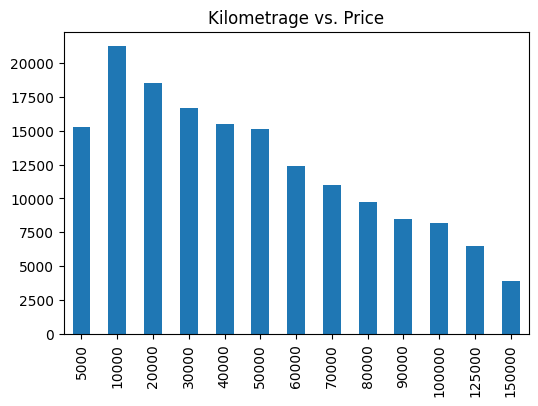

In [46]:
%matplotlib inline
plot = mpbk.plot.bar(title="Kilometrage vs. Price")

Its clear that there is a strong corelation between Kilometrage and price of the vehicle, other than the first outlier at 5 000 Km, the more a car was driven the more its devalued. This is pretty much expected result.

### Effect of damage on asking price
Now lets find out how damage on cars corelates with the asking price.

In [47]:
damaged_cars = autos.loc[autos["unrepaired_damage"] == "ja", "price"].mean()
non_damaged_cars = autos.loc[autos["unrepaired_damage"] == "nein", "price"].mean()

print(f"Average price of damaged cars is: {damaged_cars}$.")
print(f"Average price of not damaged cars is: {non_damaged_cars}$.")

Average price of damaged cars is: 2492.1362926611646$.
Average price of not damaged cars is: 7359.772109548483$.


Unsurprisingly damaged cars are a lot cheaper about 3 times.

## Conclusion
In this project we have taken our first steps with Pandas. We have read a dataset into a DataFrame and cleaned it by:

- standardising column names
- removing useless information
- removing invalid information
- cleaning date data and converting it into uniform numeric data

We then ran some analyses.

- We found that cars in the 9 most popular brands fall into one of two categories - Luxury Cars or Everyday Brands - judging by the brand's mean asking price
- We found no obvious linkage between a brand's mean asking price and its mean kilometrage
- We did find a strong linkage between a car's kilometrage and its asking price, as can be expected
- We found that cars with unrepaired damage are offered for significantly less than undamaged cars

Finally, suggestions for additional analyses to do on the dataset:

- check for linkage between the car's gearbox, vehicle type or engine type and its asking price
- check for the most popular model for each brand
- check which brands/models/vehicle types are most likely to sell quickly